In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [4]:
df=pd.read_csv("D:\mohamed Orabi\Data set\Employee.csv")
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [6]:
categorical_data=df.select_dtypes(include='object')
categorical_data

numerical_data=df.select_dtypes(include='int64')
numerical_data

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
0,2017,3,34,0,0
1,2013,1,28,3,1
2,2014,3,38,2,0
3,2016,3,27,5,1
4,2017,3,24,2,1
...,...,...,...,...,...
4648,2013,3,26,4,0
4649,2013,2,37,2,1
4650,2018,3,27,5,1
4651,2012,3,30,2,0


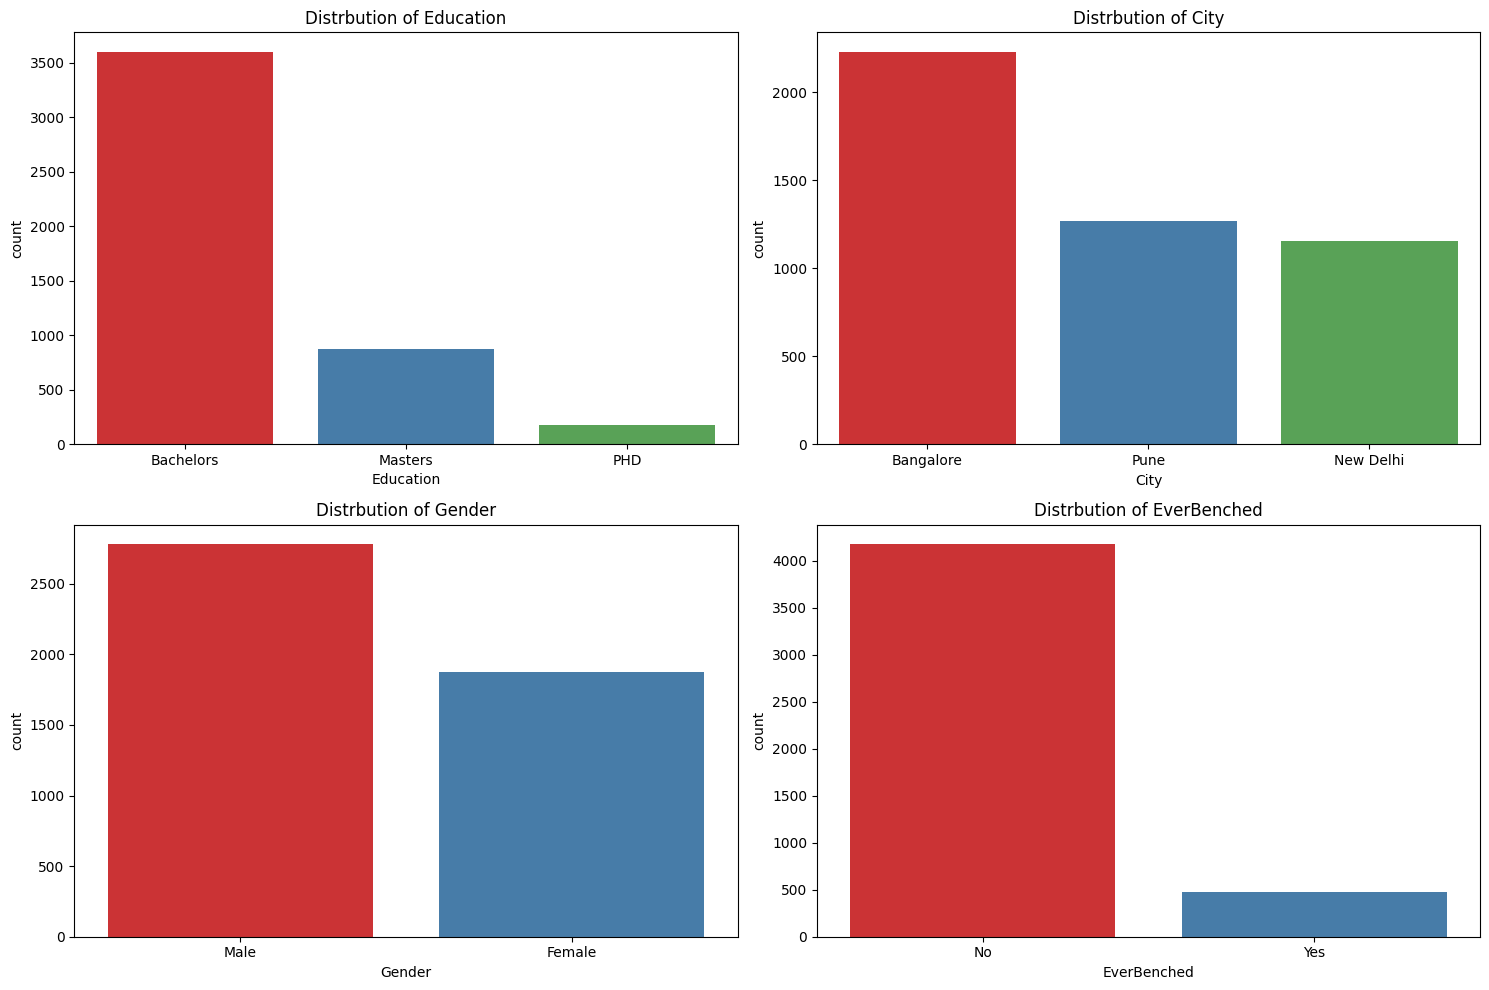

In [7]:
fig,ax=plt.subplots(2,2,figsize=(15,10))
for i,col in enumerate(categorical_data.columns):
    axs=ax[i//2,i%2]
    sns.countplot(x=df[col],ax=axs,palette='Set1')
    axs.set_title(f'Distrbution of {col}')

plt.tight_layout()
plt.show()

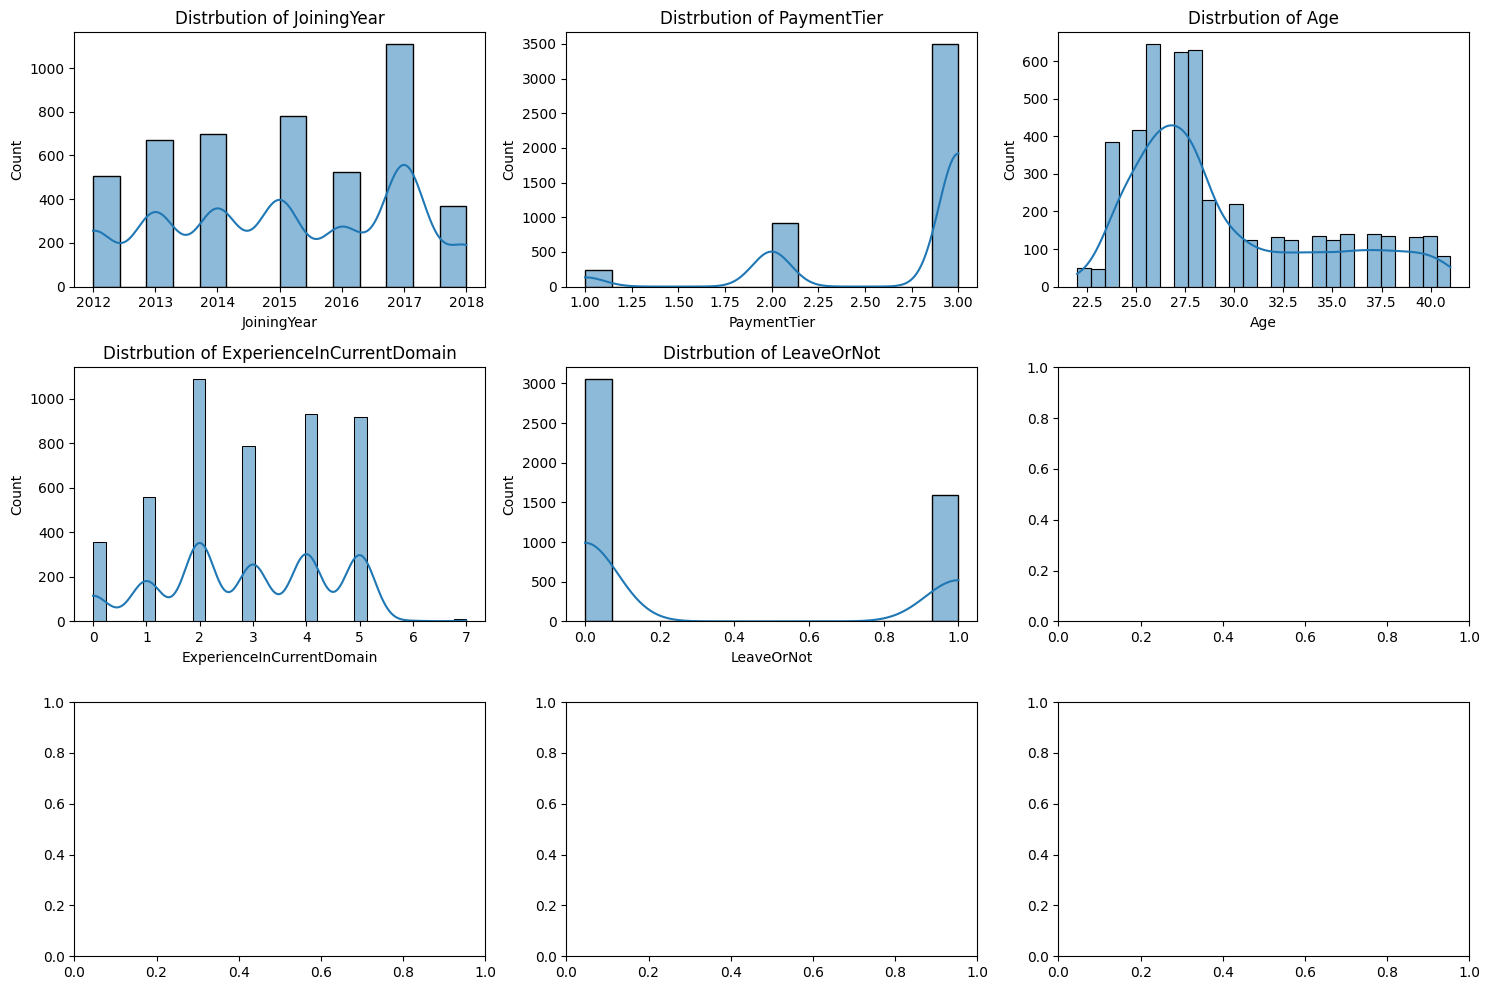

In [8]:
fig,ax=plt.subplots(3,3,figsize=(15,10))
for i,col in enumerate(numerical_data.columns):
    axs=ax[i//3,i%3]
    sns.histplot(x=df[col],ax=axs,palette='Set1',kde=True)
    axs.set_title(f'Distrbution of {col}')

plt.tight_layout()
plt.show()

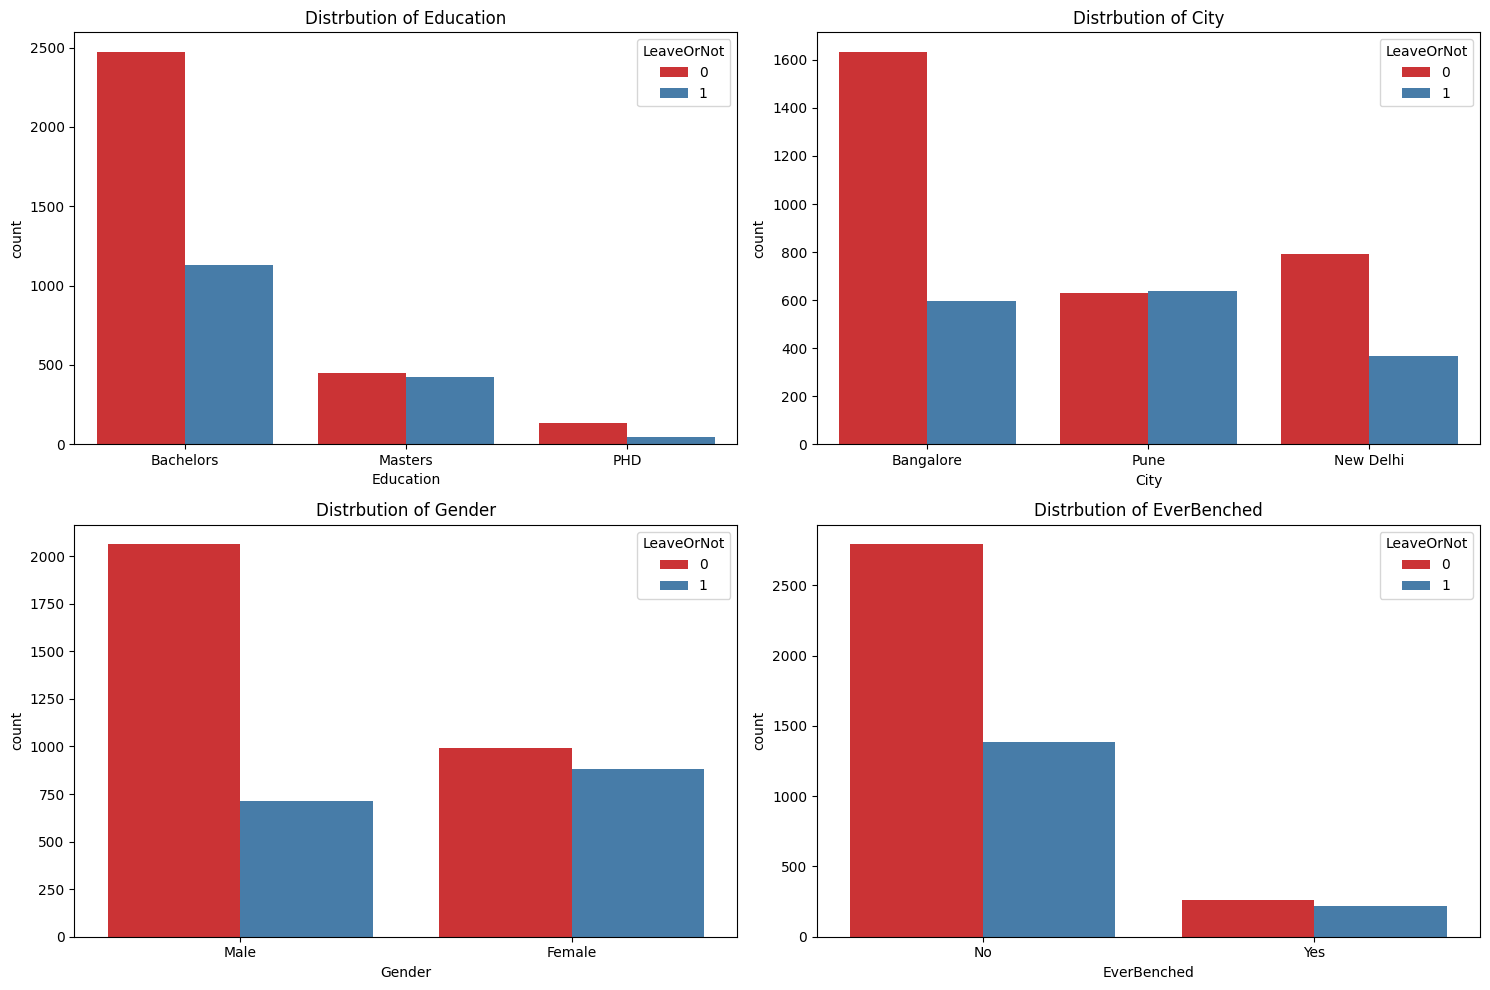

In [9]:
fig,ax=plt.subplots(2,2,figsize=(15,10))
for i,col in enumerate(categorical_data.columns):
    axs=ax[i//2,i%2]
    sns.countplot(x=df[col],ax=axs,palette='Set1',hue=df['LeaveOrNot'])
    axs.set_title(f'Distrbution of {col}')

plt.tight_layout()
plt.show()

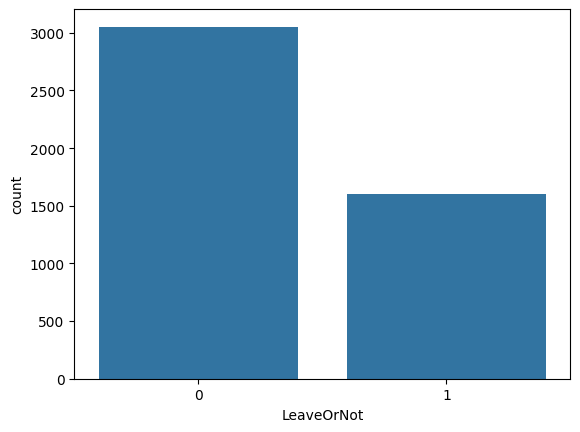

In [10]:
sns.countplot(x=df['LeaveOrNot'])
plt.show()

In [11]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [12]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [13]:
label=LabelEncoder()

for i in categorical_data.columns:
    df[i]=label.fit_transform(df[i])
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1
4651,0,2012,0,3,30,1,1,2,0


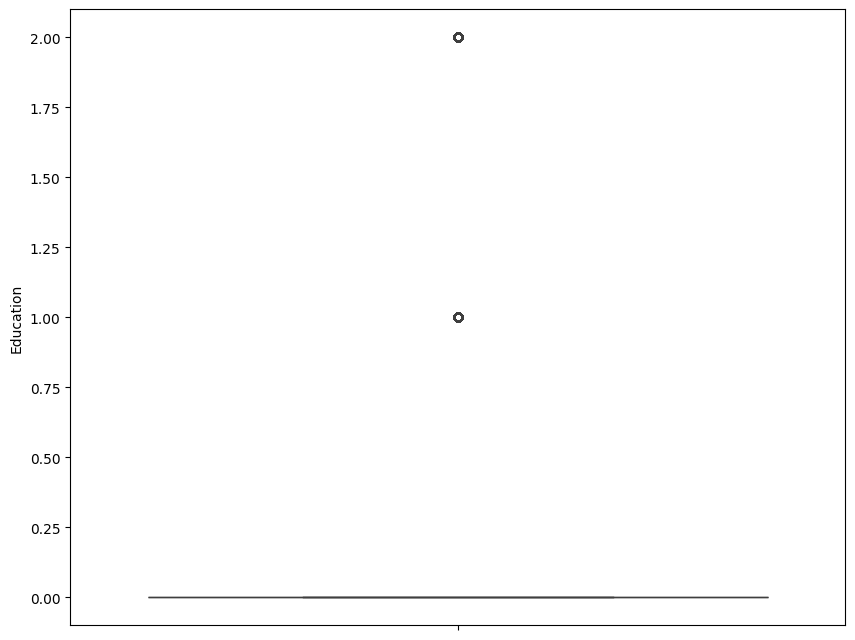

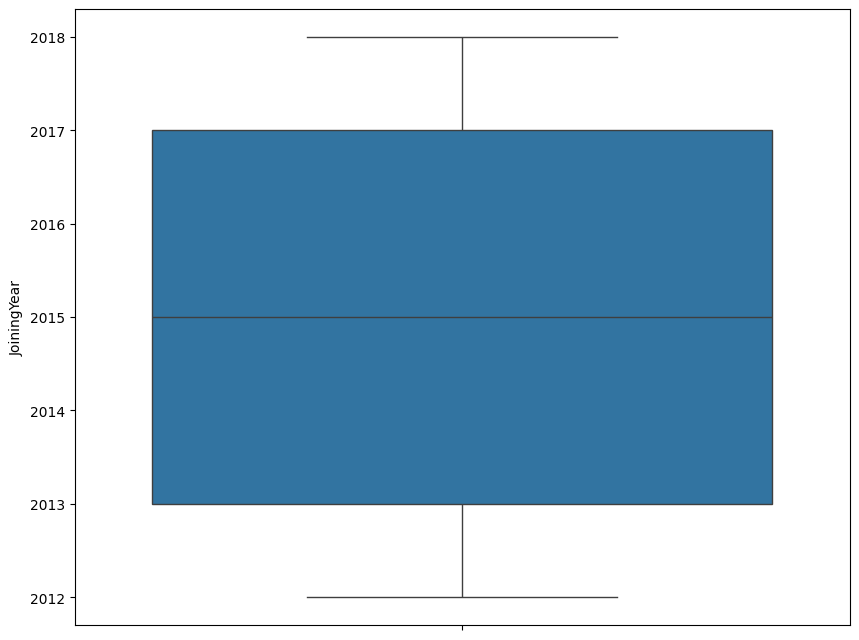

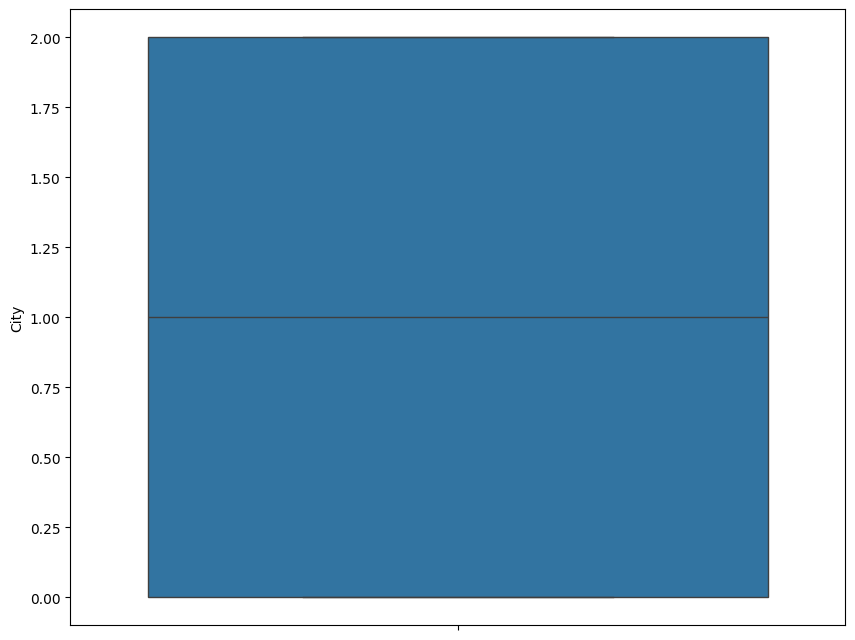

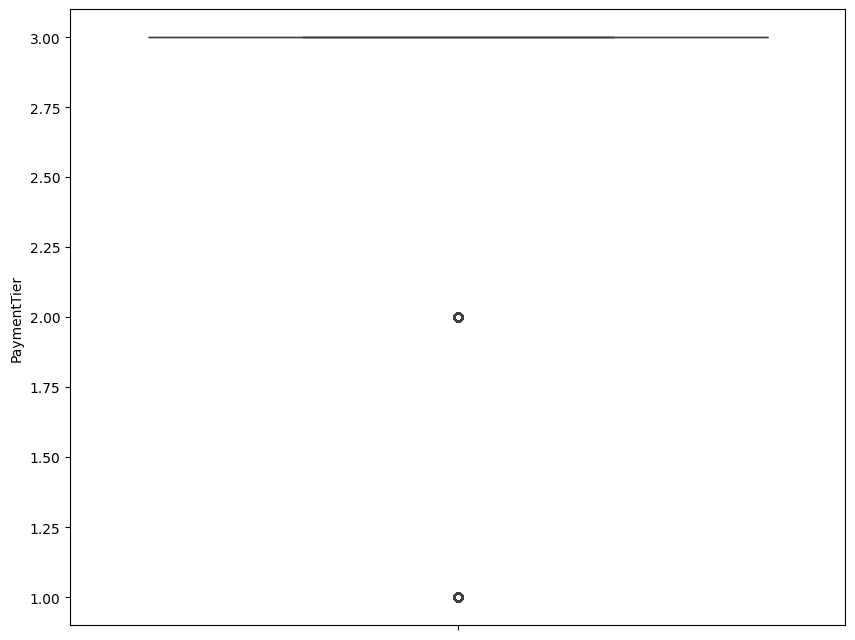

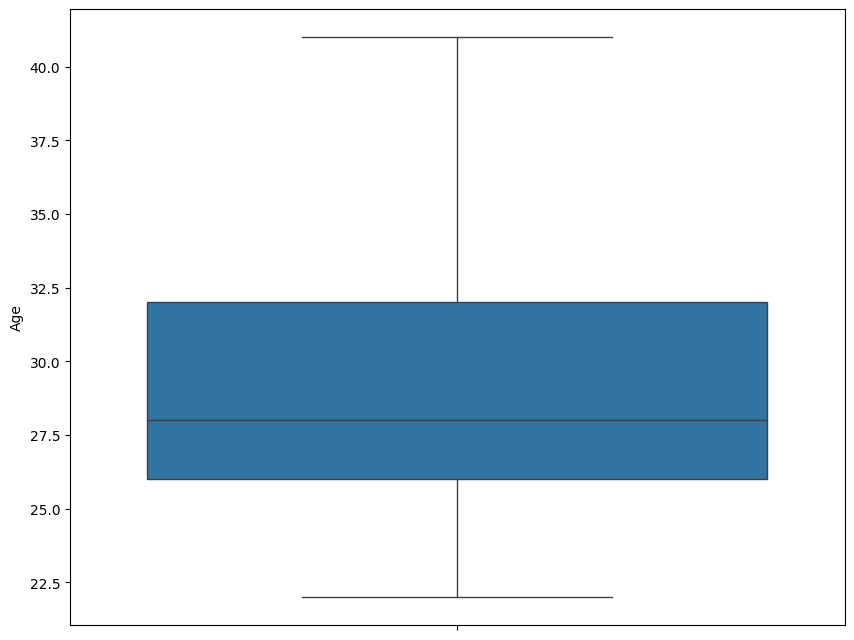

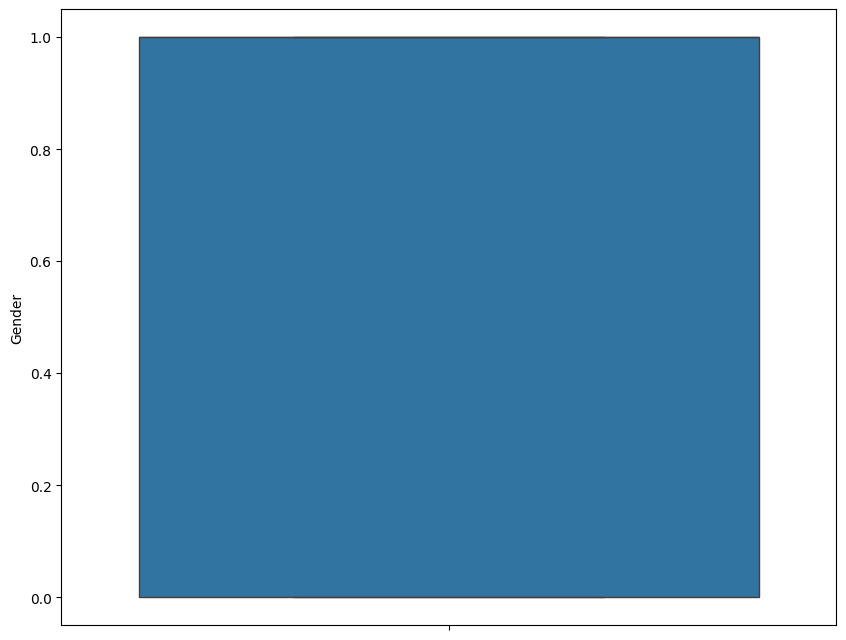

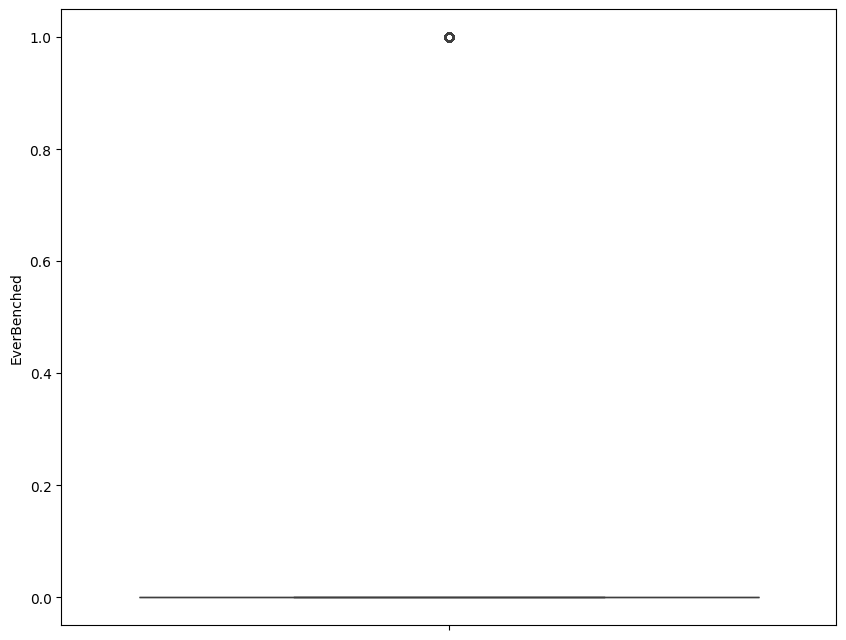

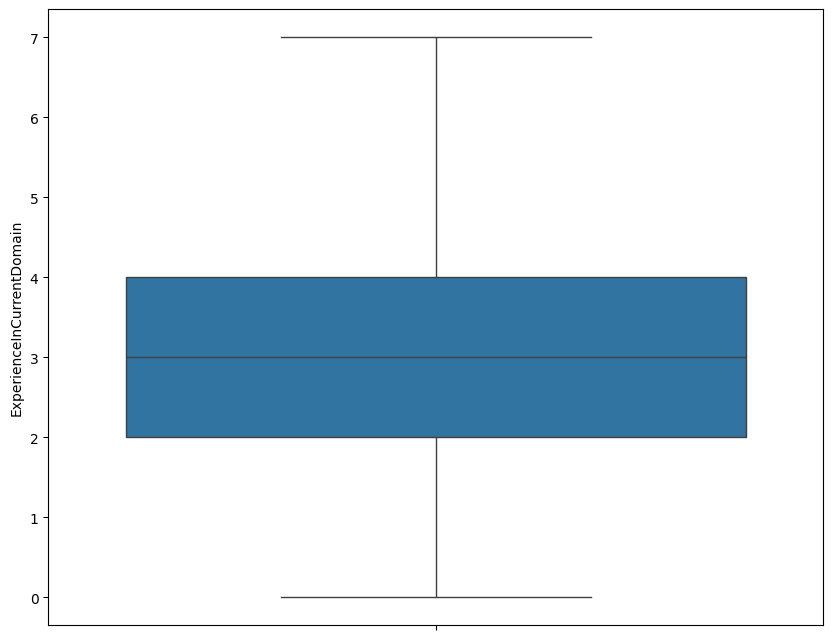

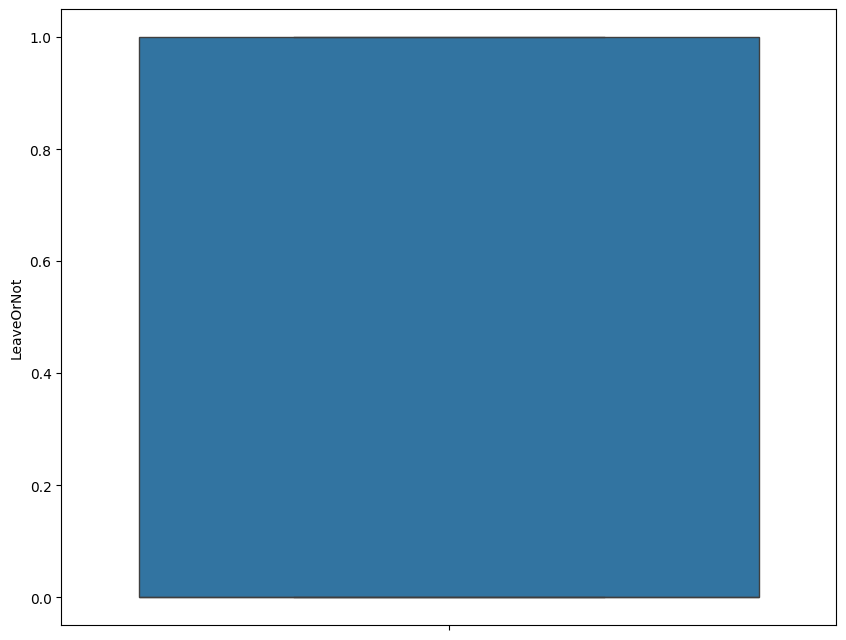

In [14]:
for i in df:
    fig,axs=plt.subplots(figsize=(10,8))
    sns.boxplot(df[i])
plt.show()

In [15]:
x=df.drop("LeaveOrNot",axis=1)
y=df['LeaveOrNot']

<Axes: xlabel='LeaveOrNot', ylabel='count'>

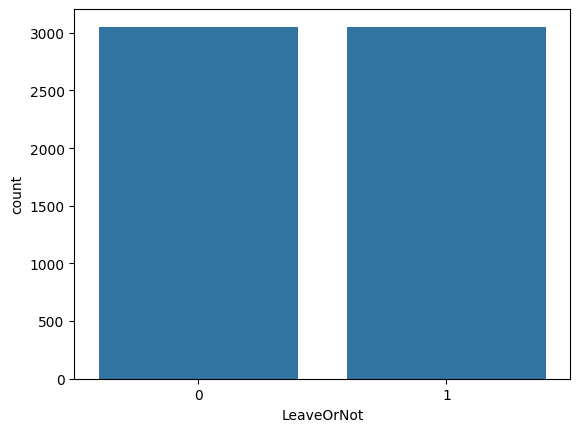

In [16]:
from imblearn.over_sampling import RandomOverSampler

sampler=RandomOverSampler(random_state=20)

x_sample,y_sample=sampler.fit_resample(x,y)

sns.countplot(x=y_sample)

In [17]:
def evaluation(y_test,ypred):
    
    cm=confusion_matrix(y_test,ypred)
    sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
    plt.title("Actual vs predication")
    plt.xlabel('Actual')
    plt.ylabel("predication")
    plt.show()
    
    print(classification_report(y_test,ypred))
    return

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x_sample,y_sample,test_size=0.20,random_state=20)

In [19]:
std=StandardScaler()

x_train_scaled=std.fit_transform(x_train)

x_test_scaled=std.transform(x_test)

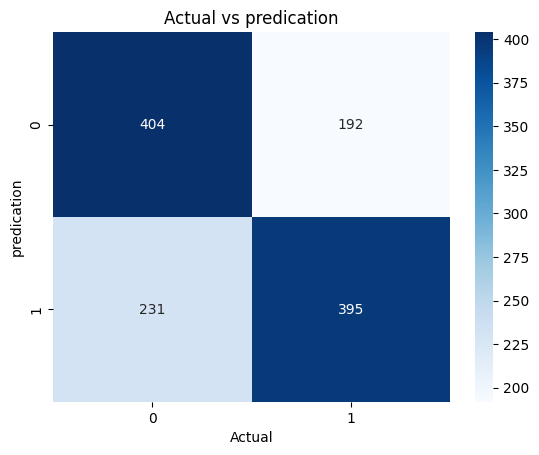

              precision    recall  f1-score   support

           0       0.64      0.68      0.66       596
           1       0.67      0.63      0.65       626

    accuracy                           0.65      1222
   macro avg       0.65      0.65      0.65      1222
weighted avg       0.66      0.65      0.65      1222



In [20]:
lr=LogisticRegression()

lr.fit(x_train_scaled,y_train)

y_pred=lr.predict(x_test_scaled)

evaluation(y_test,y_pred)

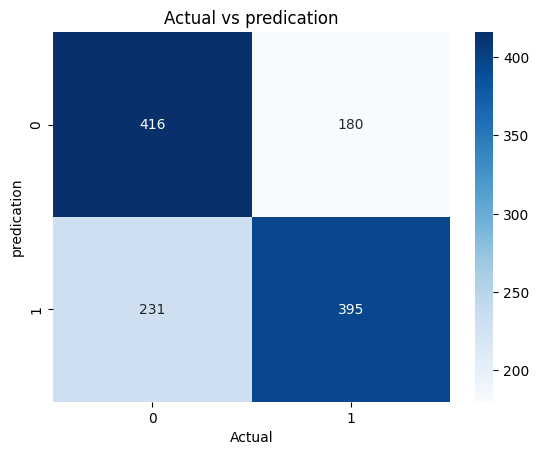

              precision    recall  f1-score   support

           0       0.64      0.70      0.67       596
           1       0.69      0.63      0.66       626

    accuracy                           0.66      1222
   macro avg       0.66      0.66      0.66      1222
weighted avg       0.67      0.66      0.66      1222



In [21]:
svm=SVC(C=2, degree=1, gamma=0.01, kernel='linear')

svm.fit(x_train_scaled,y_train)

ypred=svm.predict(x_test_scaled)

evaluation(y_test,ypred)

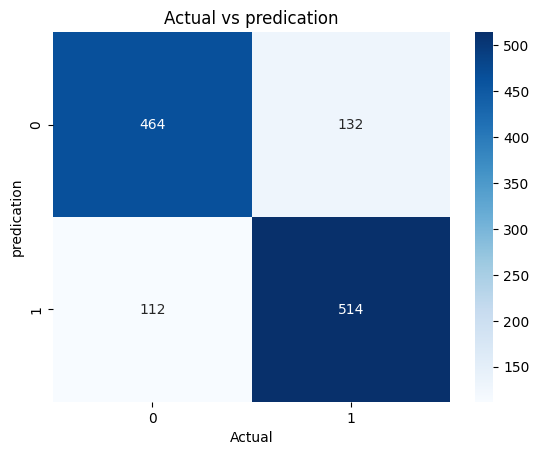

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       596
           1       0.80      0.82      0.81       626

    accuracy                           0.80      1222
   macro avg       0.80      0.80      0.80      1222
weighted avg       0.80      0.80      0.80      1222



In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train_scaled,y_train)

ypred=knn.predict(x_test_scaled)

evaluation(y_test,ypred)

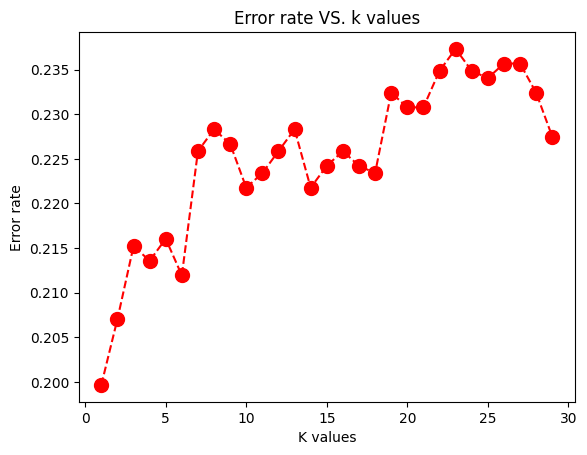

In [23]:
error_rate=[]

for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled,y_train)
    ypred=knn.predict(x_test_scaled)
    error_rate.append(np.mean(ypred!=y_test))

plt.plot(range(1,30),error_rate,linestyle='dashed',marker='o',markersize=10,color='r')
plt.title("Error rate VS. k values")
plt.xlabel("K values")
plt.ylabel("Error rate")
plt.show()

# PCA

In [29]:
from sklearn.decomposition import PCA 
from sklearn.feature_selection import chi2,mutual_info_classif,VarianceThreshold,SelectKBest 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [77]:
pca=PCA(n_components=2)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)

In [78]:
pca.explained_variance_ratio_

array([0.75584263, 0.11597229])

In [79]:
pca.explained_variance_ratio_.sum()

0.8718149159832951

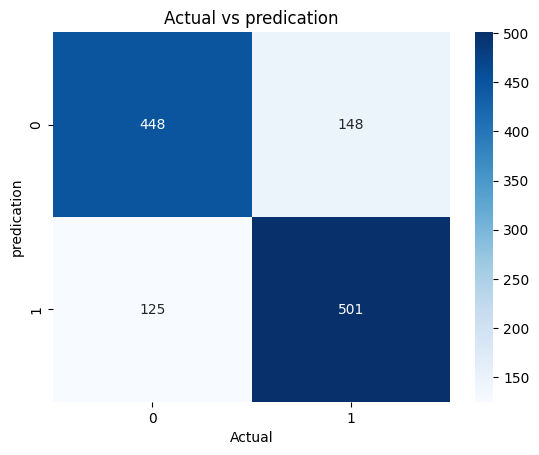

              precision    recall  f1-score   support

           0       0.78      0.75      0.77       596
           1       0.77      0.80      0.79       626

    accuracy                           0.78      1222
   macro avg       0.78      0.78      0.78      1222
weighted avg       0.78      0.78      0.78      1222



In [80]:
knn=KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train_pca,y_train)

ypred=knn.predict(x_test_pca)

evaluation(y_test,ypred)

# Information Gain

In [83]:
value_best=SelectKBest(mutual_info_classif,k=2)
value_best.fit(x_train,y_train)
x_train_gain=value_best.transform(x_train)
x_test_gain=value_best.transform(x_test)

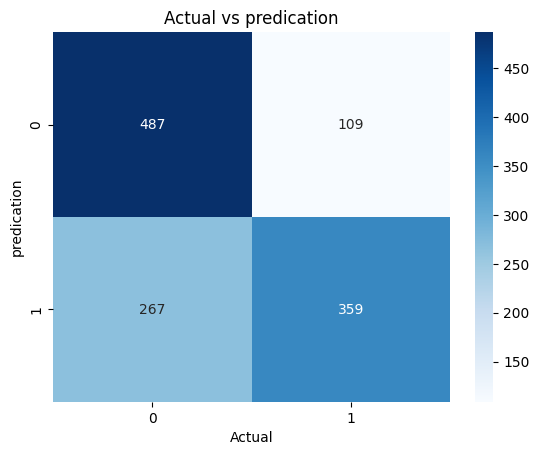

              precision    recall  f1-score   support

           0       0.65      0.82      0.72       596
           1       0.77      0.57      0.66       626

    accuracy                           0.69      1222
   macro avg       0.71      0.70      0.69      1222
weighted avg       0.71      0.69      0.69      1222



In [84]:
knn=KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train_gain,y_train)

ypred=knn.predict(x_test_gain)

evaluation(y_test,ypred)

# chi2

In [86]:
chi2_best_value=SelectKBest(chi2,k=5)
chi2_best_value.fit(x_train,y_train)
x_train_chi2=value_best.transform(x_train)
x_test_chi2=value_best.transform(x_test)



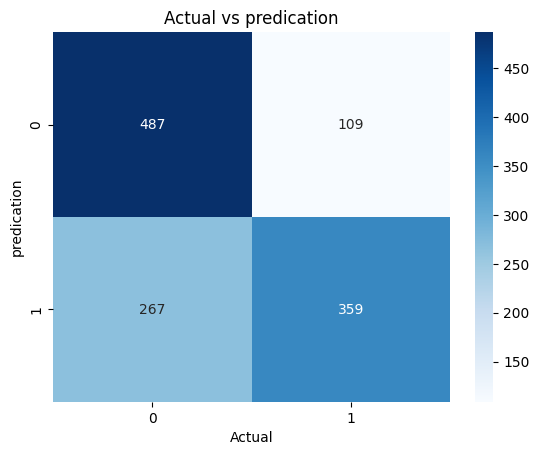

              precision    recall  f1-score   support

           0       0.65      0.82      0.72       596
           1       0.77      0.57      0.66       626

    accuracy                           0.69      1222
   macro avg       0.71      0.70      0.69      1222
weighted avg       0.71      0.69      0.69      1222



In [87]:
knn=KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train_chi2,y_train)

ypred=knn.predict(x_test_chi2)

evaluation(y_test,ypred)

In [104]:
Threshold=0.2

variance=VarianceThreshold(threshold=Threshold)
x_train_var=variance.fit_transform(x_train)
x_test_var=variance.transform(x_test)

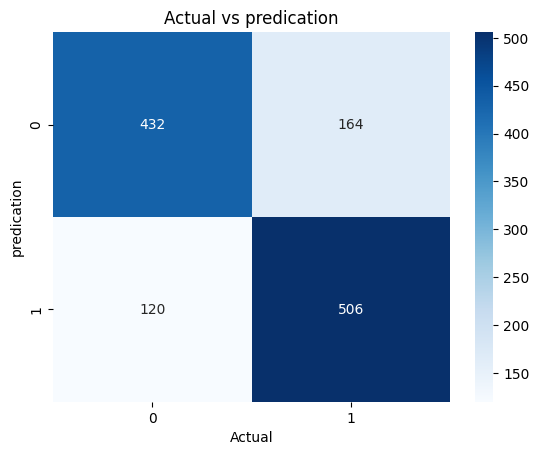

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       596
           1       0.76      0.81      0.78       626

    accuracy                           0.77      1222
   macro avg       0.77      0.77      0.77      1222
weighted avg       0.77      0.77      0.77      1222



In [105]:
knn=KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train_var,y_train)

ypred=knn.predict(x_test_var)

evaluation(y_test,ypred)

# Fisher Score

In [107]:
lda=LinearDiscriminantAnalysis(n_components=1)
x_train_lda=lda.fit_transform(x_train,y_train)
x_test_lda=lda.transform(x_test)

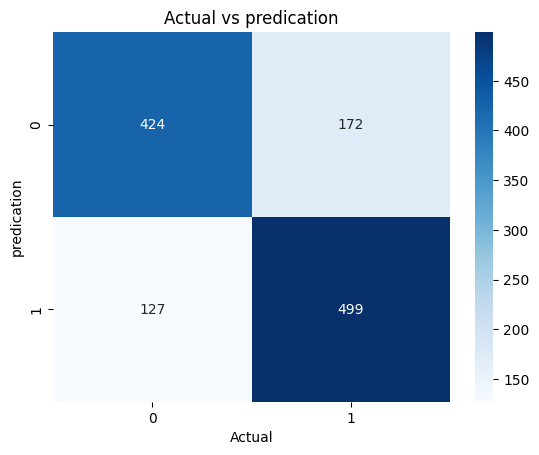

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       596
           1       0.74      0.80      0.77       626

    accuracy                           0.76      1222
   macro avg       0.76      0.75      0.75      1222
weighted avg       0.76      0.76      0.75      1222



In [108]:
knn=KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train_lda,y_train)

ypred=knn.predict(x_test_lda)

evaluation(y_test,ypred)